In [ ]:
!pip install -q hvplot
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install -q yfinance
!pip install pandas_datareader
!pip install yfinance

In [5]:
pip install yfinance

  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
  Using cached multitasking-0.0.10.tar.gz (8.2 kB)
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=2c948ab14b37aca6ee3275041d1ac63a2a6966b4f48415d4477665ec826a9b00
  Stored in directory: /Users/johntseng/Library/Caches/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import yfinance as yfin

# For time stamps
from datetime import datetime

In [2]:
# Set up End and Start times for data grab
tech_list = ['AAPL', 'XOM', 'JPM']

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
SPY = yf.download("^GSPC", start, end)
tech_list.append("^GSPC")   #^GSPC means S&P500

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, XOM, JPM, SPY]
company_name = ["APPLE", "ExxonMobilCorp","JPmorgan" "SPY"]

for company, com_name in zip(company_list, tech_list):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2019-04-29,51.099998,51.492500,50.965000,51.152500,49.807198,88818800,AAPL
2019-04-30,50.764999,50.849998,49.777500,50.167500,48.848106,186139600,AAPL
2019-05-01,52.470001,53.827499,52.307499,52.630001,51.245850,259309200,AAPL
2019-05-02,52.459999,53.162498,52.032501,52.287498,50.912357,127985200,AAPL
2019-05-03,52.722500,52.959999,52.557499,52.937500,51.545261,83569600,AAPL
...,...,...,...,...,...,...,...
2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4061070000,^GSPC
2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3760420000,^GSPC
2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3876340000,^GSPC


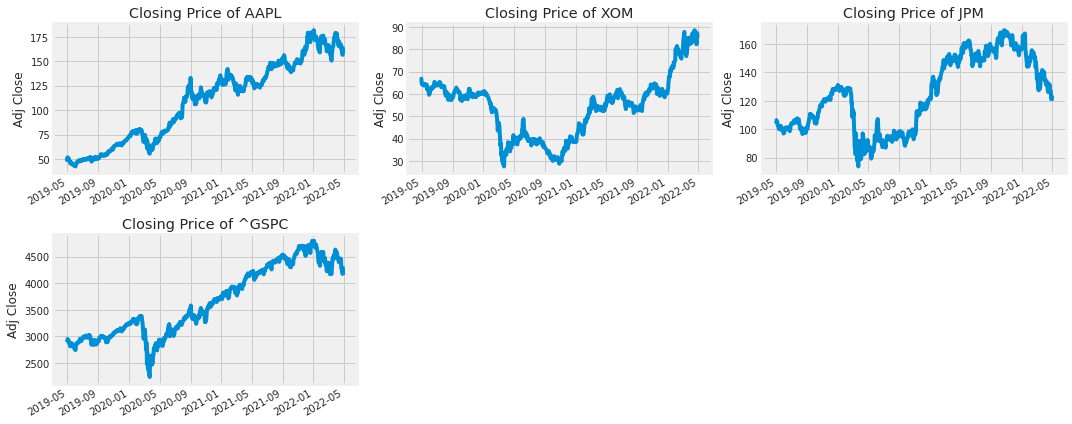

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## What was the moving average of the various stock?

In [ ]:
ma_day = [50, 100, 200]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

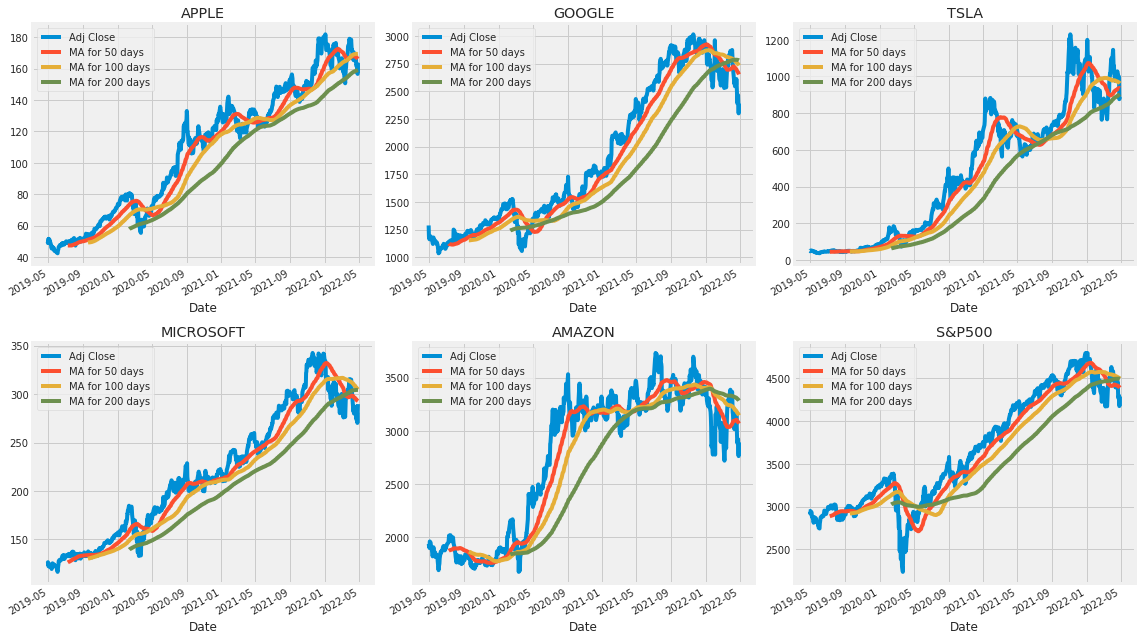

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(9)
fig.set_figwidth(16)

AAPL[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

XOM[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[0,1])
axes[0,1].set_title('ExxonMobilCorp')

JPM[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[1,0])
axes[1,0].set_title('JPMorgan')


SPY[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[1,2])
axes[1,2].set_title('S&P500')


fig.tight_layout()

##  What was the daily return of the stock on average?

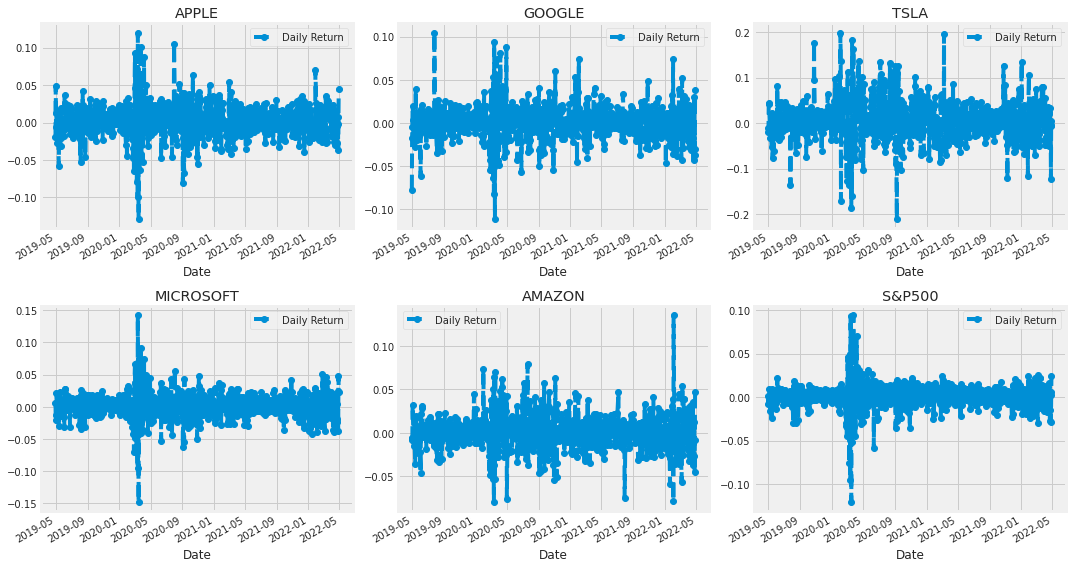

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

XOM['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('ExxonMobilCorp')

JPM['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('JPMorgan')


SPY['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title('S&P500')


fig.tight_layout()


## What was the correlation between different stocks closing prices?

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.tail() 

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA,^GSPC
Date,,,,,,
2022-04-22,161.789993,2392.280029,274.029999,2887.000000,1005.049988,4271.779785
2022-04-25,162.880005,2465.000000,280.720001,2921.479980,998.020020,4296.120117
2022-04-26,156.800003,2390.120117,270.220001,2787.820068,876.419983,4175.200195
2022-04-27,156.570007,2300.409912,283.220001,2763.340088,881.510010,4183.959961
2022-04-28,163.639999,2388.229980,289.630005,2891.929932,877.510010,4287.500000


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA,^GSPC
Date,,,,,,
2019-04-29,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,-0.019256,-0.076966,0.006396,-0.006144,-0.011513,0.000951
2019-05-01,0.049086,-0.017165,-0.020827,-0.007786,-0.019607,-0.007502
2019-05-02,-0.006508,-0.004683,-0.013059,-0.005598,0.043118,-0.002124
2019-05-03,0.012431,0.019602,0.021314,0.032428,0.044777,0.009638


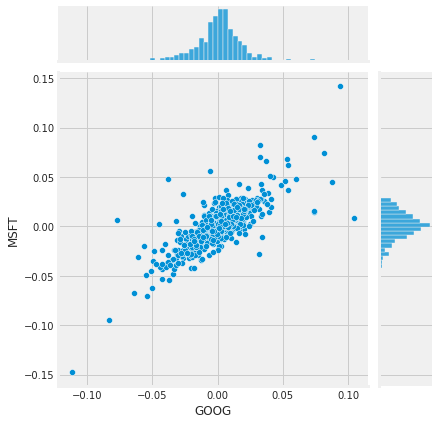

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

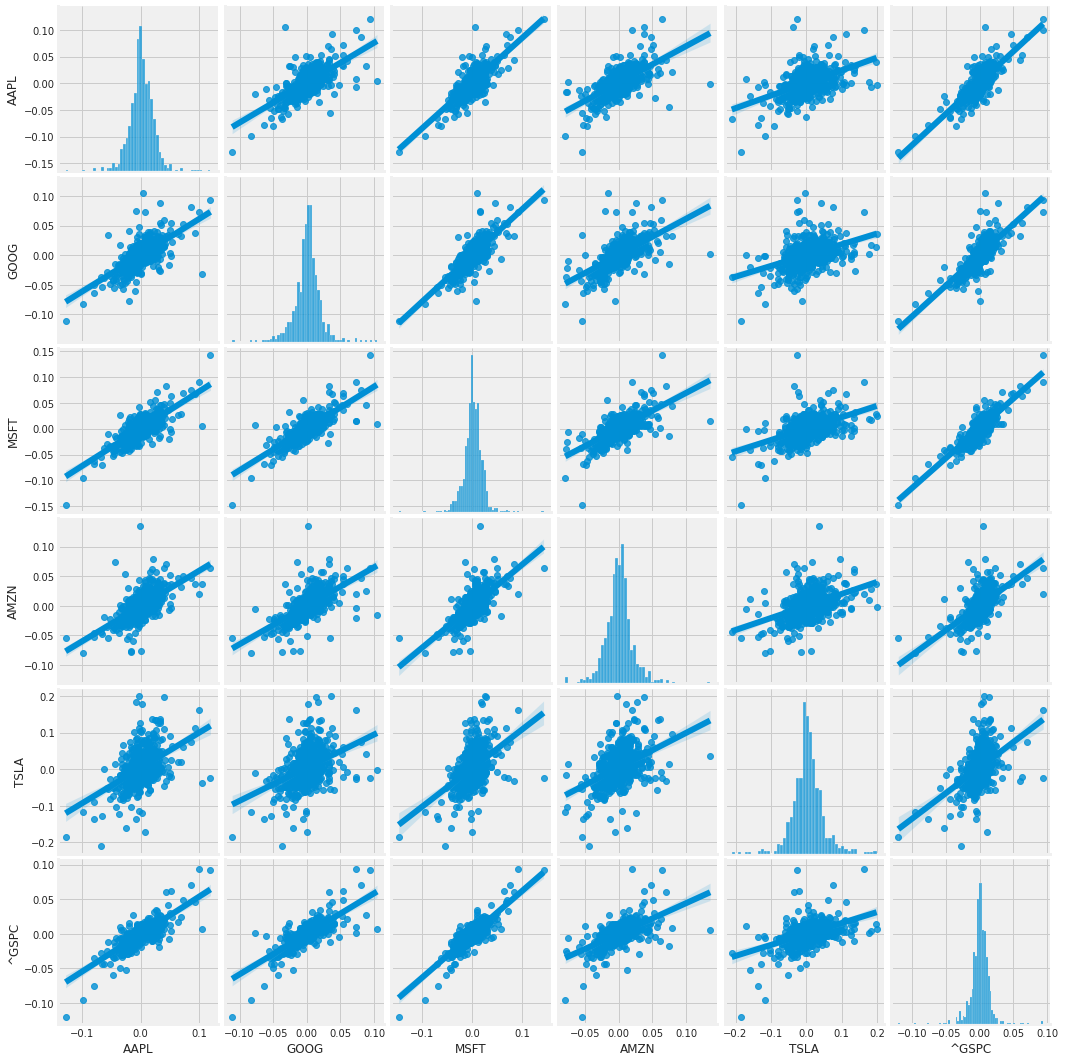

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

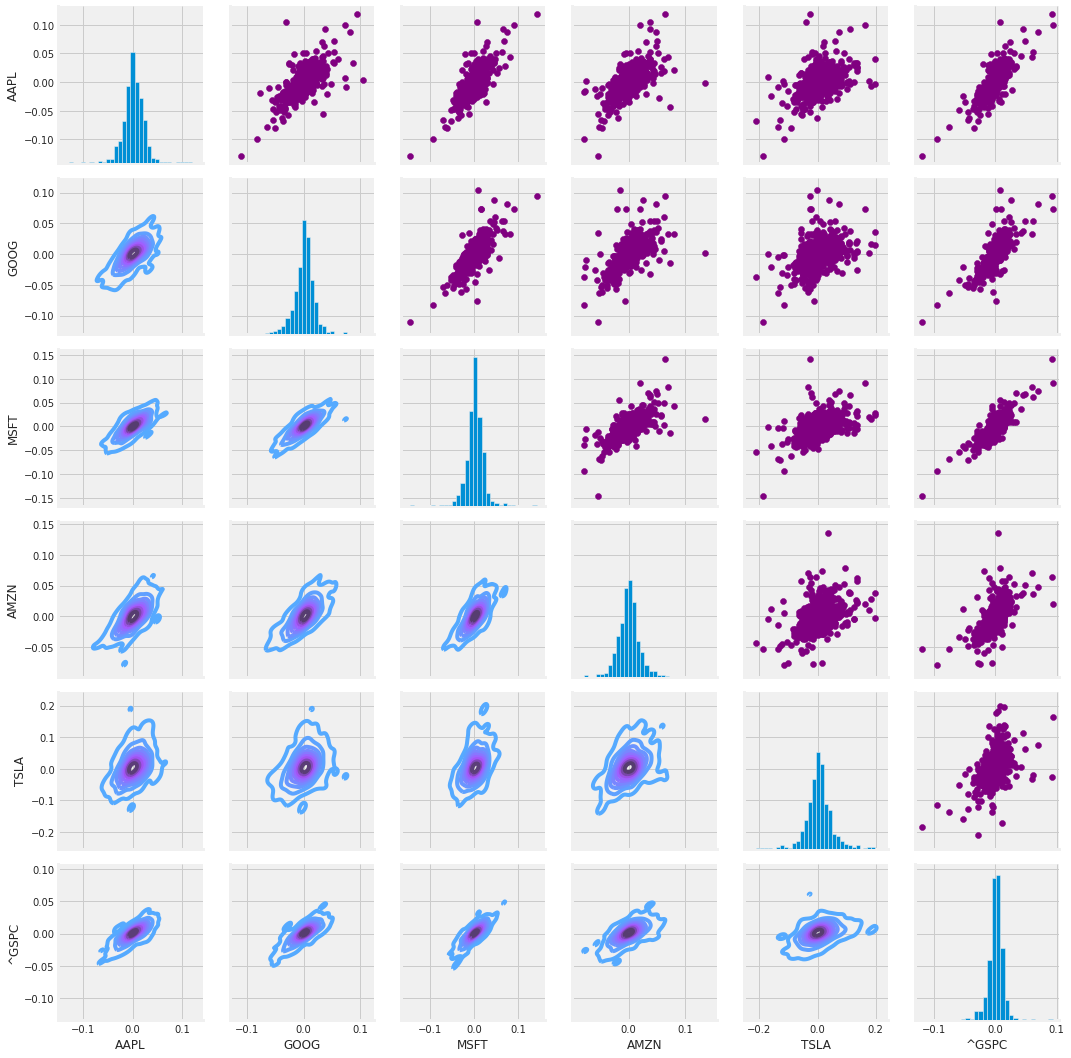

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

5. How much value do we put at risk by investing in a particular stock?

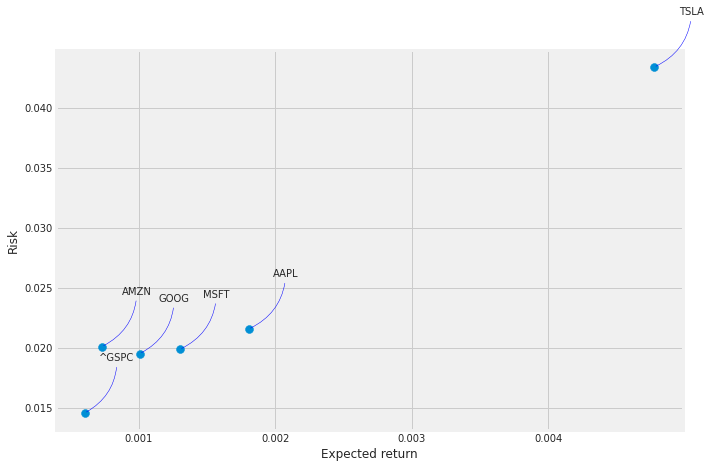

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

6. Predicting the closing price stock price of APPLE inc

In [ ]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2020-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.894333
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.175934
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.759010
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.412109
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.593040
...,...,...,...,...,...,...
2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005
2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003
2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.570007


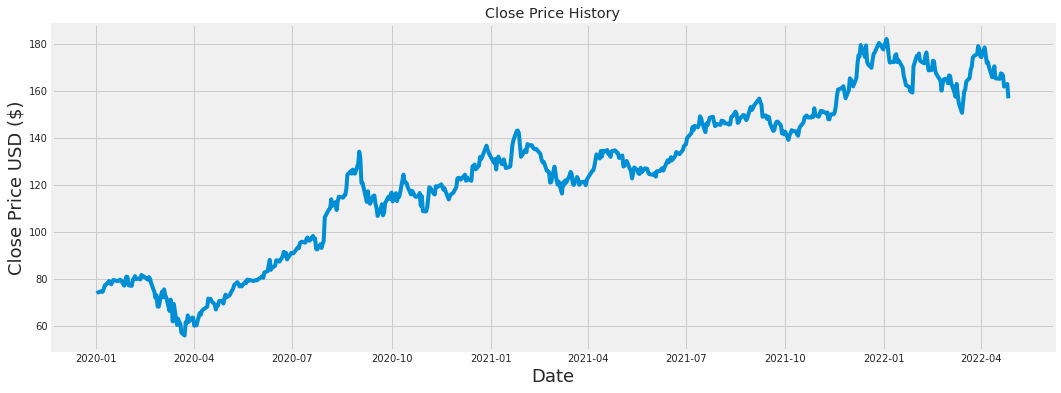

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


Linear Regresion model use EDA

In [ ]:
!pip install pandas_ta

     |████████████████████████████████| 115 kB 22.5 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=893e817172cd483107ca0f72d76e43d0a7fbd751b5369837bd9782cc5a7b19a8
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas_ta as ta

In [ ]:
#linear regression model for apple company
df = DataReader('AAPL', data_source='yahoo', start='2018-01-01', end=datetime.now())
df1 = df[['Adj Close']]

In [ ]:
np.mean(df1['Adj Close'].iloc[0:20])

41.63102703094482

In [ ]:
print(df1)

             Adj Close
Date                  
2018-01-02   41.135754
2018-01-03   41.128586
2018-01-04   41.319637
2018-01-05   41.790066
2018-01-08   41.634853
...                ...
2022-04-25  162.880005
2022-04-26  156.800003
2022-04-27  156.570007
2022-04-28  163.639999
2022-04-29  157.580002

[1090 rows x 1 columns]


In [ ]:
df1.ta.ema(close='Adj close', length=20, append=True)
df1.head(20)
#ema_10 first10 would be the SMA of the first 10 
# https://www.thebalance.com/simple-exponential-and-weighted-moving-averages-1031196
# 后面10个 是ema

,Adj Close,EMA_20
Date,,
2018-01-02,41.135754,NaN
2018-01-03,41.128586,NaN
2018-01-04,41.319637,NaN
2018-01-05,41.790066,NaN
2018-01-08,41.634853,NaN
2018-01-09,41.630074,NaN
2018-01-10,41.620522,NaN
2018-01-11,41.856930,NaN
2018-01-12,42.289165,NaN


In [ ]:
df2 = df1.iloc[20:]
df2

,Adj Close,EMA_20
Date,,
2018-01-31,39.982342,41.474009
2018-02-01,40.065918,41.339905
2018-02-02,38.327469,41.053007
2018-02-05,37.369881,40.702233
2018-02-06,38.931625,40.533604
...,...,...
2022-04-25,162.880005,167.555304
2022-04-26,156.800003,166.530989
2022-04-27,156.570007,165.582324


In [ ]:
# Split data into testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[['Adj Close']], df2[['EMA_20']], test_size=.2)

In [ ]:
print(X_test.describe())

        Adj Close
count  214.000000
mean    91.276086
std     45.068301
min     34.464798
25%     48.068543
50%     78.150600
75%    130.135410
max    177.973251


In [ ]:
print(X_train.describe())

        Adj Close
count  856.000000
mean    89.846887
std     45.201305
min     35.589466
25%     48.832862
50%     72.815163
75%    129.929943
max    181.778397


In [ ]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.98452101]]
Mean Absolute Error: 2.6755152772764754
Coefficient of Determination: 0.9938145577420202


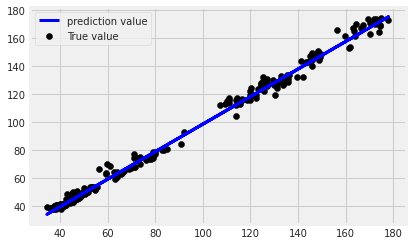

In [ ]:
plt.scatter(X_test, y_test, color="black", label = "True value")
plt.plot(X_test, y_pred, color="blue", linewidth=3, label = "prediction value")
plt.legend()
plt.show()

Model Coefficients: [[0.97773531]]
Mean Absolute Error: 53.112289559960594
Coefficient of Determination: 0.9880362044570021


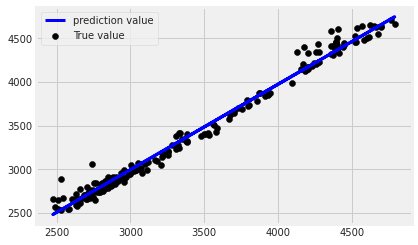

In [ ]:
df = DataReader('^GSPC', data_source='yahoo', start='2018-01-01', end=datetime.now())
df1 = df[['Adj Close']]
df1.ta.ema(close='Adj close', length=20, append=True)
df2 = df1.iloc[20:]
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df2[['Adj Close']], df2[['EMA_20']], test_size=.2)
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.scatter(X_test, y_test, color="black", label = "True value")
plt.plot(X_test, y_pred, color="blue", linewidth=3, label = "prediction value")
plt.legend()
plt.show()

# Time series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
from random import sample
warnings.filterwarnings('ignore')
from mpl_toolkits import mplot3d
#from mpl_toolkits.mplot3d import Axes3D
# statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

%matplotlib inline
sns.set_style("darkgrid")

ImportError: ignored

In [ ]:
Ticker = ["MSFT"]
train_data = yf.download(tickers = Ticker, start = "2018-01-01", end = "2021-12-31")
validation_data = yf.download(tickers = Ticker, start = "2022-01-01", end = "2022-04-29")

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(10,13), 'figure.dpi':120})

# Import data
df = train_data["Adj Close"]
df.index = np.arange(0, df.shape[0], 1)

cols = ["Trend", "Autocorrelation", "Q-Q plot"]
rows = ["Original", "1st Order Differencing", "2nd Order Differencing", "Logged Data", "1st Order Differencing Logged Data"]
fig, axes = plt.subplots(5, 3, sharex=False)
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row)

# original data
axes[0, 0].plot(df)
plot_acf(df, ax=axes[0, 1], lags = 20)
sm.qqplot(((df - np.mean(df)) / np.std(df)), ax=axes[0, 2], line = "45")

# 1st Differencing
df_1d = df.diff()
axes[1, 0].plot(df_1d)
plot_acf(df_1d.dropna(), ax=axes[1, 1], lags = 20)
sm.qqplot(((df_1d - np.mean(df_1d)) / np.std(df_1d)), ax=axes[1, 2], line = "45")

# 2nd Differencing
df_2d = df.diff().diff()
axes[2, 0].plot(df_2d)
plot_acf(df_2d.dropna(), ax=axes[2, 1], lags = 20)
sm.qqplot(((df_2d - np.mean(df_2d)) / np.std(df_2d)), ax=axes[2, 2], line = "45")

# Logged Data
df_log = np.log(df)
axes[3, 0].plot(df_log)
plot_acf(df_log, ax=axes[3, 1], lags = 20)
sm.qqplot(((df_log - np.mean(df_log)) / np.std(df_log)), ax=axes[3, 2], line = "45")

# Logged Data 1st Differencing
df_log_1d = np.log(df).diff()
axes[4, 0].plot(df_log_1d)
plot_acf(df_log_1d.dropna(), ax=axes[4, 1], lags = 20)
sm.qqplot(((df_log_1d - np.mean(df_log_1d)) / np.std(df_log_1d)), ax=axes[4, 2], line = "45")


plt.show()

# lstm model
Table of Contents:
Loading the Data
Train and Test Split
Data Preprocessing
LSTM
Prediction
Conclusion

In [1]:
!pip install tensorflow

In [5]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2018-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.135757
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.128582
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.319633
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.790066
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.634846
...,...,...,...,...,...,...
2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005
2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003
2022-04-27,159.789993,155.380005,155.910004,156.570007,88063200.0,156.570007


LSTM
LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is that LSTM can store past important information and forget the information that is not.
LSTM has three gates:
The input gate: The input gate adds information to the cell state,
The forget gate: It removes the information that is no longer required by the model,
The output gate: Output Gate at LSTM selects the information to be shown as output.

In [6]:
df = DataReader('AAPL', data_source='yahoo', start='2018-01-01', end=datetime.now())
data = df.filter(['Close'])
dataset = data.values
len(dataset)

1090

## LSTM: APPLE EPOCHS = 25

In [6]:
#Apple company with EPOCHS = 25
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
df = DataReader('AAPL', data_source='yahoo', start='2018-01-01', end=datetime.now())
data = df.filter(['Close'])
dataset = data.values
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Epoch 1/25
 - 2s - loss: 0.0062
Epoch 2/25
 - 2s - loss: 6.8384e-04
Epoch 3/25
 - 2s - loss: 6.1249e-04
Epoch 4/25
 - 2s - loss: 5.2540e-04
Epoch 5/25
 - 2s - loss: 4.1626e-04
Epoch 6/25
 - 2s - loss: 3.7531e-04
Epoch 7/25
 - 2s - loss: 3.5358e-04
Epoch 8/25
 - 2s - loss: 3.0993e-04
Epoch 9/25
 - 2s - loss: 3.1226e-04
Epoch 10/25
 - 2s - loss: 2.8826e-04
Epoch 11/25
 - 2s - loss: 2.9216e-04
Epoch 12/25
 - 2s - loss: 2.6496e-04
Epoch 13/25
 - 2s - loss: 2.7807e-04
Epoch 14/25
 - 2s - loss: 2.6022e-04
Epoch 15/25


KeyboardInterrupt: 

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_random_seed(0)

# download the data
df = DataReader('AAPL', data_source='yahoo', start='2018-01-01', end=datetime.now())
data = df.filter(['Close'])
dataset = data.values
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(dataset)

# generate the input and output sequences
n_lookback = 20  # length of input sequences (lookback period)
n_forecast = 100    # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=25, batch_size=32, verbose=0)

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title='AAPL')


InvalidArgumentError: Incompatible shapes: [32,100] vs. [32,100,1]
	 [[{{node loss_4/dense_3_loss/SquaredDifference}}]]

## LSTM: APPLE EPOCHS = 50

Epoch 1/50
 - 2s - loss: 0.0041
Epoch 2/50
 - 2s - loss: 8.4325e-04
Epoch 3/50
 - 2s - loss: 7.4610e-04
Epoch 4/50
 - 2s - loss: 6.4455e-04
Epoch 5/50
 - 2s - loss: 5.3155e-04
Epoch 6/50
 - 2s - loss: 4.9179e-04
Epoch 7/50
 - 2s - loss: 4.5464e-04
Epoch 8/50
 - 2s - loss: 4.1322e-04
Epoch 9/50
 - 2s - loss: 4.0903e-04
Epoch 10/50
 - 2s - loss: 3.7076e-04
Epoch 11/50
 - 2s - loss: 3.5934e-04
Epoch 12/50
 - 2s - loss: 3.3946e-04
Epoch 13/50
 - 2s - loss: 3.4140e-04
Epoch 14/50
 - 11s - loss: 3.3516e-04
Epoch 15/50
 - 17s - loss: 3.2987e-04
Epoch 16/50
 - 4s - loss: 3.0108e-04
Epoch 17/50
 - 5s - loss: 2.8713e-04
Epoch 18/50
 - 4s - loss: 2.9240e-04
Epoch 19/50
 - 3s - loss: 2.9023e-04
Epoch 20/50
 - 5s - loss: 2.7232e-04
Epoch 21/50
 - 3s - loss: 2.9059e-04
Epoch 22/50
 - 4s - loss: 2.7721e-04
Epoch 23/50
 - 7s - loss: 2.6501e-04
Epoch 24/50
 - 4s - loss: 2.6411e-04
Epoch 25/50
 - 5s - loss: 2.6061e-04
Epoch 26/50
 - 4s - loss: 2.5636e-04
Epoch 27/50
 - 3s - loss: 2.6497e-04
Epoch 28/50


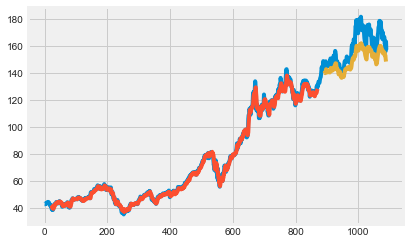

In [16]:
#Apple company with EPOCHS = 50
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
df = DataReader('AAPL', data_source='yahoo', start='2018-01-01', end=datetime.now())
data = df.filter(['Close'])
dataset = data.values
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

# download the data
df = DataReader('AAPL', data_source='yahoo', start='2018-01-01', end=datetime.now())
data = df.filter(['Close'])
dataset = data.values
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(dataset)

# generate the input and output sequences
n_lookback = 20  # length of input sequences (lookback period)
n_forecast = 100    # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=50, batch_size=32, verbose=0)

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title='AAPL')


## LSTM: APPLE EPOCHS = 100

Epoch 1/100
851/851 - 7s - loss: 0.0046 - 7s/epoch - 8ms/step
Epoch 2/100
851/851 - 1s - loss: 8.6169e-04 - 1s/epoch - 1ms/step
Epoch 3/100
851/851 - 1s - loss: 7.2693e-04 - 1s/epoch - 1ms/step
Epoch 4/100
851/851 - 1s - loss: 5.3191e-04 - 1s/epoch - 2ms/step
Epoch 5/100
851/851 - 1s - loss: 3.8907e-04 - 1s/epoch - 2ms/step
Epoch 6/100
851/851 - 1s - loss: 3.6181e-04 - 1s/epoch - 2ms/step
Epoch 7/100
851/851 - 1s - loss: 3.0658e-04 - 1s/epoch - 1ms/step
Epoch 8/100
851/851 - 1s - loss: 3.1413e-04 - 1s/epoch - 1ms/step
Epoch 9/100
851/851 - 1s - loss: 2.8272e-04 - 1s/epoch - 2ms/step
Epoch 10/100
851/851 - 1s - loss: 3.1313e-04 - 1s/epoch - 1ms/step
Epoch 11/100
851/851 - 1s - loss: 2.9073e-04 - 1s/epoch - 1ms/step
Epoch 12/100
851/851 - 1s - loss: 2.6590e-04 - 1s/epoch - 2ms/step
Epoch 13/100
851/851 - 1s - loss: 2.9449e-04 - 1s/epoch - 1ms/step
Epoch 14/100
851/851 - 1s - loss: 2.5885e-04 - 1s/epoch - 2ms/step
Epoch 15/100
851/851 - 1s - loss: 2.5850e-04 - 1s/epoch - 1ms/step
Epoch 16

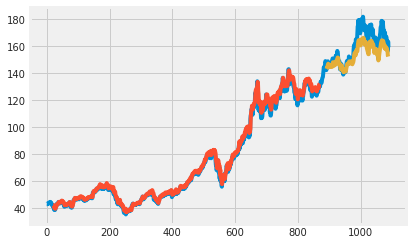

In [ ]:
#Apple company with EPOCHS = 100
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
df = DataReader('AAPL', data_source='yahoo', start='2018-01-01', end=datetime.now())
data = df.filter(['Close'])
dataset = data.values
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# https://towardsdatascience.com/time-series-forecasting-with-recurrent-neural-networks-74674e289816

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_random_seed(0)

# download the data
df = DataReader('AAPL', data_source='yahoo', start='2018-01-01', end=datetime.now())
data = df.filter(['Close'])
dataset = data.values
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(dataset)

# generate the input and output sequences
n_lookback = 20  # length of input sequences (lookback period)
n_forecast = 30    # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title='AAPL')


InvalidArgumentError: Incompatible shapes: [32,30] vs. [32,30,1]
	 [[{{node loss_2/dense_2_loss/SquaredDifference}}]]

Epoch 1/100
851/851 - 10s - loss: 0.0055 - 10s/epoch - 12ms/step
Epoch 2/100
851/851 - 2s - loss: 9.0127e-04 - 2s/epoch - 2ms/step
Epoch 3/100
851/851 - 2s - loss: 7.2178e-04 - 2s/epoch - 2ms/step
Epoch 4/100
851/851 - 2s - loss: 6.6995e-04 - 2s/epoch - 2ms/step
Epoch 5/100
851/851 - 1s - loss: 6.0091e-04 - 1s/epoch - 2ms/step
Epoch 6/100
851/851 - 1s - loss: 5.6639e-04 - 1s/epoch - 2ms/step
Epoch 7/100
851/851 - 1s - loss: 5.1707e-04 - 1s/epoch - 2ms/step
Epoch 8/100
851/851 - 1s - loss: 5.2044e-04 - 1s/epoch - 2ms/step
Epoch 9/100
851/851 - 1s - loss: 4.9895e-04 - 1s/epoch - 2ms/step
Epoch 10/100
851/851 - 1s - loss: 4.5290e-04 - 1s/epoch - 2ms/step
Epoch 11/100
851/851 - 1s - loss: 4.5142e-04 - 1s/epoch - 2ms/step
Epoch 12/100
851/851 - 1s - loss: 4.2162e-04 - 1s/epoch - 2ms/step
Epoch 13/100
851/851 - 1s - loss: 4.0485e-04 - 1s/epoch - 2ms/step
Epoch 14/100
851/851 - 1s - loss: 4.2654e-04 - 1s/epoch - 2ms/step
Epoch 15/100
851/851 - 1s - loss: 3.8565e-04 - 1s/epoch - 2ms/step
Epoch

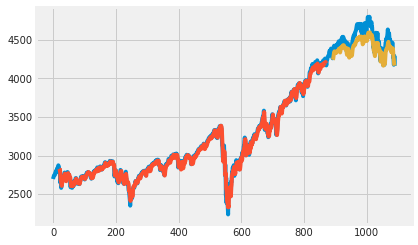

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
df = DataReader('^GSPC', data_source='yahoo', start='2018-01-01', end=datetime.now())
data = df.filter(['Close'])
dataset = data.values
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

# download the data
df = DataReader('^GSPC', data_source='yahoo', start='2018-01-01', end=datetime.now())
data = df.filter(['Close'])
dataset = data.values
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(dataset)

# generate the input and output sequences
n_lookback = 20  # length of input sequences (lookback period)
n_forecast = 100    # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title='^GSPC')


AttributeError: module 'tensorflow._api.v1.random' has no attribute 'set_seed'

yellow indicates the Predicted Data；
Blue indicates the Complete Data；
red indicates the Train Data

GRU

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_AAPL = DataReader('AAPL', data_source='yahoo', start='2018-01-01', end=datetime.now())
data_AAPL = df_AAPL.filter(['Close']).values
# normalize the dataset
sc = MinMaxScaler(feature_range=(0, 1))
data_AAPL_scaled = sc.fit_transform(data_AAPL)
# split into train and test sets
train_size = int(len(data_AAPL) * 0.8)
test_size = len(data_AAPL) - train_size
train, test = data_AAPL[0:train_size,:], data_AAPL[train_size:len(data_AAPL),:]

In [ ]:
X_train = []

#Price on next day
y_train = []

window = 60

for i in range(window, train_size):
    X_train_ = np.reshape(data_AAPL_scaled[i-window:i, 0], (window, 1))
    X_train.append(X_train_)
    y_train.append(data_AAPL_scaled[i, 0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)

In [ ]:
# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 60, 50)            7950      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_5 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_6 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_7 (GRU)                 (None, 50)               

In [ ]:
modelGRU.compile(optimizer='sgd', loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=100, batch_size=16)



Epoch 1/100
51/51 [==============================] - 13s 112ms/step - loss: 0.0431
Epoch 2/100
51/51 [==============================] - 6s 111ms/step - loss: 0.0283
Epoch 3/100
51/51 [==============================] - 6s 110ms/step - loss: 0.0204
Epoch 4/100
51/51 [==============================] - 6s 111ms/step - loss: 0.0143
Epoch 5/100
51/51 [==============================] - 6s 110ms/step - loss: 0.0098
Epoch 6/100
51/51 [==============================] - 6s 111ms/step - loss: 0.0063
Epoch 7/100
51/51 [==============================] - 6s 111ms/step - loss: 0.0044
Epoch 8/100
51/51 [==============================] - 6s 111ms/step - loss: 0.0038
Epoch 9/100
51/51 [==============================] - 7s 129ms/step - loss: 0.0030
Epoch 10/100
51/51 [==============================] - 6s 113ms/step - loss: 0.0031
Epoch 11/100
51/51 [==============================] - 6s 113ms/step - loss: 0.0029
Epoch 12/100
51/51 [==============================] - 6s 111ms/step - loss: 0.0024
Epoch 13/100

In [ ]:
df_volume = np.vstack((train, test))

inputs = df_volume[df_volume.shape[0] - test.shape[0] - window:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

num_2 = df_volume.shape[0] - train_size + window

X_test = []

for i in range(window, num_2):
    X_test_ = np.reshape(inputs[i-window:i, 0], (window, 1))
    X_test.append(X_test_)
    
X_test = np.stack(X_test)

In [ ]:
predict = modelGRU.predict(X_test)
predict = sc.inverse_transform(predict)

In [ ]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 37.38763184109681
MAE: 4.7988252552277455
RMSE: 6.114542651833971


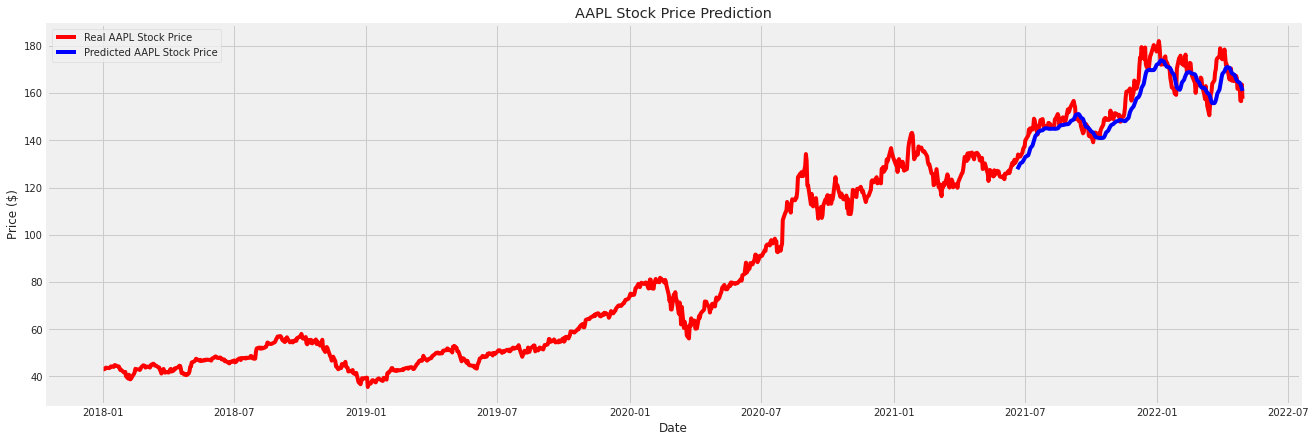

In [ ]:
df_AAPL = df_AAPL.reset_index()
plt.figure(figsize=(20,7))
plt.plot(df_AAPL['Date'].values[:], df_volume[:], color = 'red', label = 'Real AAPL Stock Price')
plt.plot(df_AAPL['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 60, 50)            7950      
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_13 (GRU)                (None, 60, 50)            15300     
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_14 (GRU)                (None, 60, 50)            15300     
                                                                 
 dropout_14 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_15 (GRU)                (None, 50)               

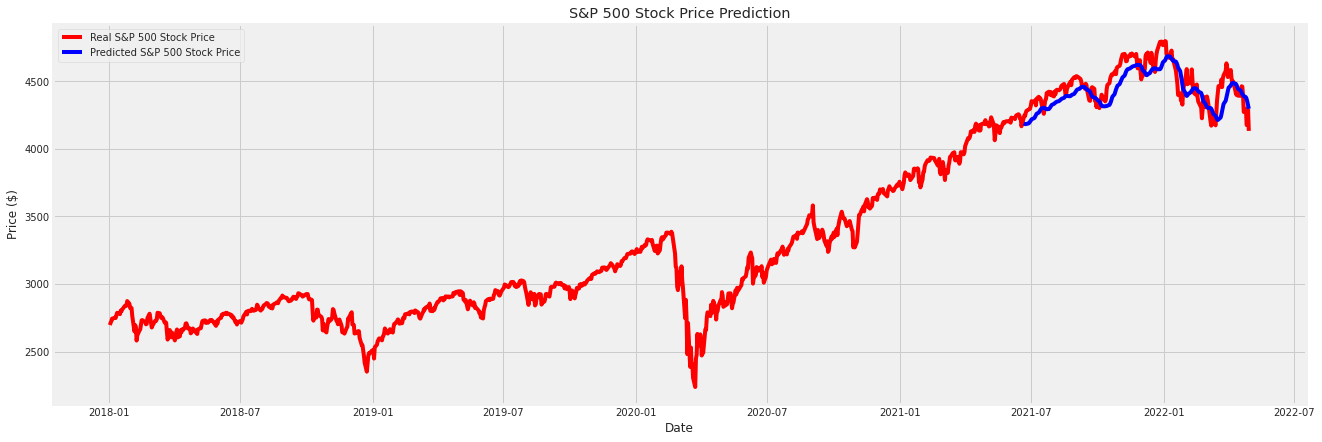

In [ ]:
df_GSPC = DataReader('^GSPC', data_source='yahoo', start='2018-01-01', end=datetime.now())
data_GSPC = df_GSPC.filter(['Close']).values
# normalize the dataset
sc = MinMaxScaler(feature_range=(0, 1))
data_GSPC_scaled = sc.fit_transform(data_GSPC)
# split into train and test sets
train_size = int(len(data_GSPC) * 0.8)
test_size = len(data_GSPC) - train_size
train, test = data_GSPC[0:train_size,:], data_GSPC[train_size:len(data_GSPC),:]

X_train = []

#Price on next day
y_train = []

window = 60

for i in range(window, train_size):
    X_train_ = np.reshape(data_GSPC_scaled[i-window:i, 0], (window, 1))
    X_train.append(X_train_)
    y_train.append(data_GSPC_scaled[i, 0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)

# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

modelGRU.compile(optimizer='sgd', loss='mean_squared_error')
modelGRU.fit(X_train, y_train, epochs=100, batch_size=16)

df_volume = np.vstack((train, test))

inputs = df_volume[df_volume.shape[0] - test.shape[0] - window:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

num_2 = df_volume.shape[0] - train_size + window

X_test = []

for i in range(window, num_2):
    X_test_ = np.reshape(inputs[i-window:i, 0], (window, 1))
    X_test.append(X_test_)
    
X_test = np.stack(X_test)

predict = modelGRU.predict(X_test)
predict = sc.inverse_transform(predict)

diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

df_GSPC = df_GSPC.reset_index()
plt.figure(figsize=(20,7))
plt.plot(df_GSPC['Date'].values[:], df_volume[:], color = 'red', label = 'Real S&P 500 Stock Price')
plt.plot(df_GSPC['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted S&P 500 Stock Price')
plt.title('S&P 500 Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()